##Loan Prediction using Deep Learning (Neural Network) Project

##Done By: Ashwath Bala S

Table of Contents:

1.Problem Statement

2.Data Dictionary

3.Loading the dataset

4.Creating training and validation set

5.Defining the architecture of the model

6.Compiling the model (defining loss function, optimizer)

7.Training the model

8.Evaluating model performance on training and validation set

9.Visualizing the Model Performance

##1. Problem Statement


##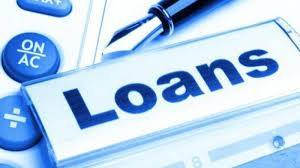



In the banking sector, accurate prediction of loan approval is crucial for both customers and financial institutions. By leveraging deep learning techniques, we aim to develop a predictive model (Using Sequential API in Neural Network) that can determine the likelihood of a loan being approved based on various customer details.

##2.Data Dictionary

Following are the column details, that our dataset has:

Loan_ID - A unique identifier for each loan application.


Gender - The gender of the applicant


Married - Marital status of the applicant


Dependents - The number of dependents the applicant has

Education - The education level of the applicant

Self_Employed - Whether the applicant is self-employed

ApplicantIncome - The income of the applicant.

CoapplicantIncome - The income of the co-applicant (if any).

LoanAmount - The loan amount requested by the applicant.

Loan_Amount_Term - The term of the loan in months.

Credit_History - Credit history of the applicant

Property_Area - The area type of the property

Loan_Status - (Target) The status of the loan application


## 3. Loading the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('loan_prediction_using_deep_learning.csv')

In [3]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [6]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [7]:
# looking at the shape of the data
data.shape

(614, 12)

In [8]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [9]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 4. Creating training and validation set

In [10]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [11]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 5. Defining the architecture of the model

### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [12]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [13]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [14]:
# number of input neurons
X_train.shape

(491, 11)

In [15]:
# number of features in the data
X_train.shape[1]

11

In [16]:
# defining input neurons
input_neurons = X_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [17]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer

In [18]:
# define number of output neurons
output_neurons = 1

In [19]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [20]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [21]:
# activation function of different layers

# for now we have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [22]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [23]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [25]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [26]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [27]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 6. Compiling the model (defining loss function, optimizer)

In [28]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 7. Training the model

In [29]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 5s 45ms/step - loss: 0.6551 - accuracy: 0.6762 - val_loss: 0.6467 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 12ms/step - loss: 0.6251 - accuracy: 0.6864 - val_loss: 0.6278 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 15ms/step - loss: 0.6114 - accuracy: 0.6864 - val_loss: 0.6185 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 12ms/step - loss: 0.6042 - accuracy: 0.6864 - val_loss: 0.6145 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.6006 - accuracy: 0.6864 - val_loss: 0.6113 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5976 - accuracy: 0.6864 - val_loss: 0.6075 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5935 - accuracy: 0.6864 - val_loss: 0.6046 - val_accuracy: 0.6911
Epoch 8/50
16/1

## 8. Evaluating model performance on validation set

In [30]:
# Get the predicted probabilities
predictions = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [31]:
# Binary classification case
predicted_classes = (predictions > 0.5).astype("int32")

In [32]:
# calculating the accuracy on validation set
accuracy_score(y_test, predicted_classes)

0.7967479674796748

###9. Visualizing the model performance

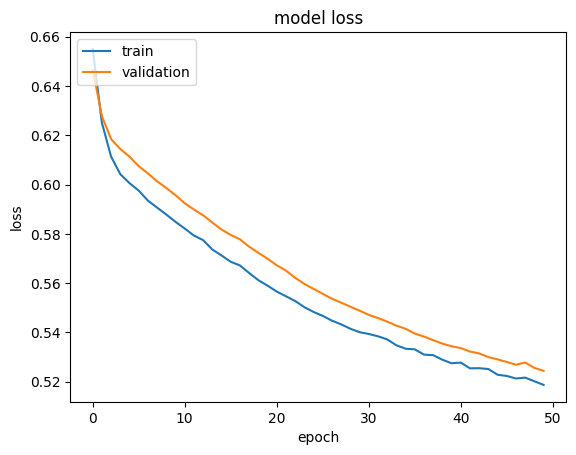

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

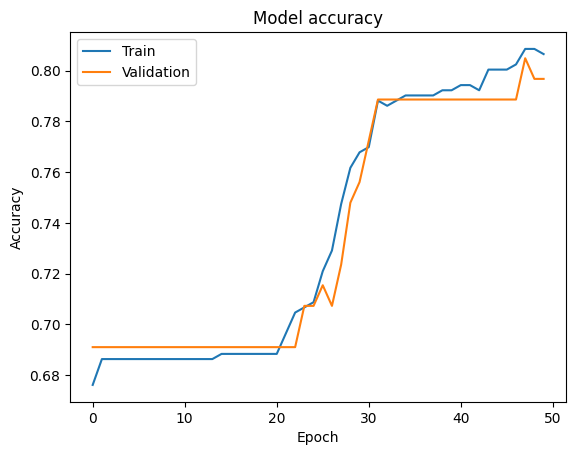

In [34]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##In this Project we have built a Deep Learning Model (Sequential API in Neural Network) to predict Loan Approval